In [1]:
#Our first machine learning model
#Garreta and Moncecchi pp 10-20
#uses Iris database and SGD classifier
import sklearn
print( 'The scikit learn version is {}.'.format(sklearn.__version__))

The scikit learn version is 0.20.1.


In [2]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target
print( X_iris.shape, y_iris.shape)

(150, 4) (150,)


In [3]:
print( X_iris[0], y_iris[0])

[5.1 3.5 1.4 0.2] 0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# Get dataset with only the first two attributes
X, y = X_iris[:, :2], y_iris
# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=33)
print( X_train.shape, y_train.shape)

(112, 2) (112,)


In [5]:
# Standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Sepal width')

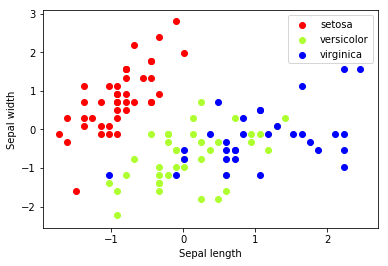

In [7]:
import matplotlib.pyplot as plt
colors = ['red','greenyellow','blue']
for i in range(len(colors)):
    xs = X_train[:,0][y_train == i]
    ys = X_train[:,1][y_train == i]
    plt.scatter(xs,ys,c=colors[i])
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [8]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)

G:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
print( clf.coef_)

[[-27.81699134  13.75308957]
 [-15.02649915 -11.33244946]
 [ 16.15781219 -13.2231982 ]]


In [10]:
print( clf.intercept_)

[-18.30388629  -8.75852383 -17.01451363]


In [11]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


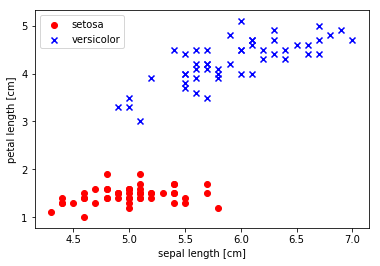

In [12]:
import numpy as np
import matplotlib.pyplot as plt

y = df.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa',-1,1)

X = df.iloc[0:100,[0,2]].values

plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

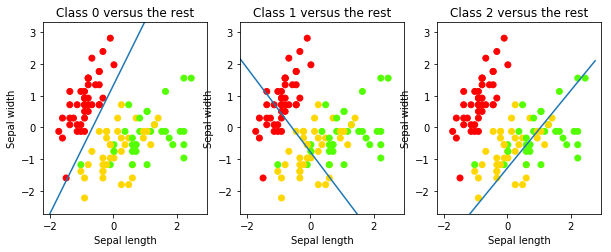

In [13]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() +.5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() +.5
xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(10, 6)
for i in [0, 1, 2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
    cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
    plt.plot(xs, ys)

In [14]:
from sklearn import metrics
y_train_pred= clf.predict(X_train)
print (metrics.accuracy_score(y_train,y_train_pred))

0.8035714285714286


In [15]:
y_pred = clf.predict(X_test)
print (metrics.accuracy_score(y_test,y_pred))

0.6842105263157895


In [16]:
print("My name is ZIHAN CHEN.")
print("My NetID is: zihanc7.")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is ZIHAN CHEN.
My NetID is: zihanc7.
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
